In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from keras import layers
from keras.applications import EfficientNetB0
gpus = tf.config.list_physical_devices("GPU")
tf.config.set_visible_devices(gpus[0],"GPU")
tf.config.experimental.set_memory_growth(gpus[0],True)
print("Using:", tf.config.experimental.get_device_details(gpus[0]).get("device_name"))


Using: NVIDIA GeForce RTX 3060


In [ ]:
img_size = 256
batch_size = 24
def plot_hist(hist, metric="accuracy"):
    plt.plot(hist.history[metric])
    
    val_metric = f"val_{metric}"
    if val_metric in hist.history:
        plt.plot(hist.history[val_metric])
        plt.legend(["train", "validation"], loc="upper left")
    else:
        plt.legend(["train"], loc="upper left")

    plt.title(f"model {metric}")
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()
    
def plot_loss(hist):
    plt.plot(hist.history["loss"])
    if "val_loss" in hist.history:
        plt.plot(hist.history["val_loss"])
        plt.legend(["train", "validation"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.show()



In [ ]:
# import tensorflow as tf
# from pathlib import Path

# root = Path("/home/tuanh/projet/DeepDetect/dataset")
# paths = [str(p) for p in root.rglob("*") if p.is_file()]

# bad = []
# for path in paths:
#     try:
#         b = tf.io.read_file(path)
#         _ = tf.io.decode_image(b, channels=3, expand_animations=False)
#     except Exception:
#         bad.append(path)

# print("TF-bad:", len(bad))
# print("\n".join(bad[:30]))


2026-01-15 13:11:08.904054: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP, WebP required.


TF-bad: 2
/home/tuanh/projet/DeepDetect/dataset/train/0/fake_015223.jpg
/home/tuanh/projet/DeepDetect/dataset/train/0/fake_040620.jpg


In [ ]:
# for f in bad:
#     os.remove(f)
# print("Removed:", len(bad))

Removed: 2


In [3]:

dataset_path = "/home/tuanh/projet/DeepDetect/dataset/train"
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_size, img_size),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_size, img_size),
  batch_size=batch_size)

print("Train batches:", tf.data.experimental.cardinality(train_ds))
print("Val batches  :", tf.data.experimental.cardinality(val_ds))


Found 100964 files belonging to 2 classes.
Using 80772 files for training.


I0000 00:00:1768501193.849755   13424 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9618 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:0b:00.0, compute capability: 8.6


Found 100964 files belonging to 2 classes.
Using 20192 files for validation.
Train batches: tf.Tensor(3366, shape=(), dtype=int64)
Val batches  : tf.Tensor(842, shape=(), dtype=int64)


Train

In [ ]:
from model import build_model

Model = build_model(img_size, EfficientNetB0)
model = Model.build_model()
checkpoint,reduce_lr,early_stop = Model.get_element("checkpoints2")

In [22]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[checkpoint, reduce_lr, early_stop]
)

Epoch 1/50
13461/13462 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7528 - loss: 0.5209

2026-01-15 13:16:13.588513: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 13:16:13.731787: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 13:16:14.285346: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 13:16:14.454633: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 13:16:15.153895: E external/local_xla/xla/stream_


Epoch 1: val_loss improved from None to 0.38675, saving model to checkpoints/epoch_001_bestmodel.keras

Epoch 1: finished saving model to checkpoints/epoch_001_bestmodel.keras
13462/13462 ━━━━━━━━━━━━━━━━━━━━ 259s 18ms/step - accuracy: 0.7701 - loss: 0.4920 - val_accuracy: 0.8275 - val_loss: 0.3867 - learning_rate: 0.0010
Epoch 2/50
13462/13462 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7806 - loss: 0.4722
Epoch 2: val_loss improved from 0.38675 to 0.36443, saving model to checkpoints/epoch_002_bestmodel.keras

Epoch 2: finished saving model to checkpoints/epoch_002_bestmodel.keras
13462/13462 ━━━━━━━━━━━━━━━━━━━━ 221s 16ms/step - accuracy: 0.7814 - loss: 0.4699 - val_accuracy: 0.8348 - val_loss: 0.3644 - learning_rate: 0.0010
Epoch 3/50
13460/13462 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7839 - loss: 0.4661
Epoch 3: val_loss improved from 0.36443 to 0.35997, saving model to checkpoints/epoch_003_bestmodel.keras

Epoch 3: finished saving model to checkpoints/epoch_003_bes

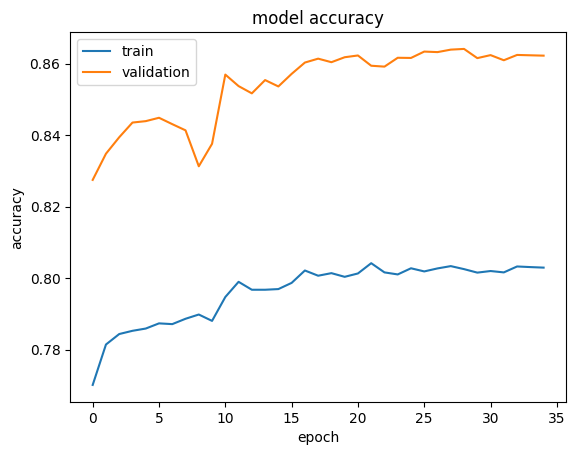

In [25]:
plot_hist(history)

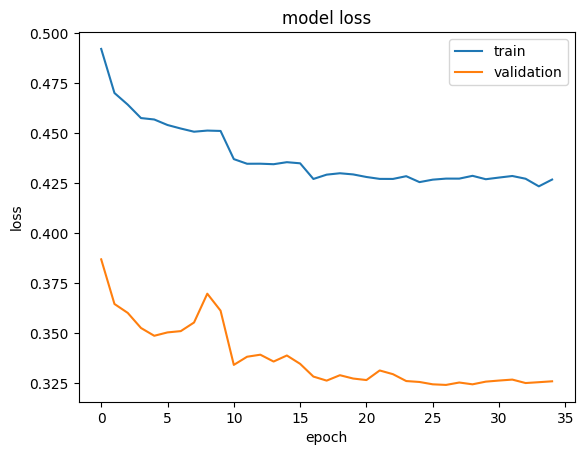

In [26]:
plot_loss(history)

In [28]:
dataset_path = "/home/tuanh/projet/DeepDetect/dataset/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,          # vd: dataset/test
    image_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False               # rất nên để False khi test
)
test_loss, test_acc = model.evaluate(test_ds)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)



Found 11219 files belonging to 2 classes.
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8591 - loss: 0.3302
Test loss: 0.33023735880851746
Test accuracy: 0.8590783476829529


In [30]:
# model.summary()

In [5]:
from model import  BuildModel
from keras.applications import EfficientNetB0
Model = BuildModel(img_size, EfficientNetB0)
model = Model.build()

# model.summary()
checkpoint,reduce_lr,early_stop = Model.get_element("checkpoints2")

Exception: URL fetch failure on https://storage.googleapis.com/keras-applications/backbone_notop.h5: 403 -- Forbidden

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[checkpoint, reduce_lr, early_stop]
)

backbone = model.get_layer("backbone")

for layer in backbone.layers[:-30]:
    layer.trainable = False
for layer in backbone.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="acc", threshold=0.5),
        tf.keras.metrics.AUC(name="auc")
    ]
)

history_2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[checkpoint, reduce_lr, early_stop]
)


Epoch 1/50


2026-01-15 19:09:29.454523: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701


3366/3366 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5098 - auc: 0.4997 - loss: 0.7826
Epoch 1: val_loss improved from None to 0.69188, saving model to checkpoints2/epoch_001_bestmodel.keras

Epoch 1: finished saving model to checkpoints2/epoch_001_bestmodel.keras
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 294s 83ms/step - accuracy: 0.5158 - auc: 0.4985 - loss: 0.7343 - val_accuracy: 0.5333 - val_auc: 0.5155 - val_loss: 0.6919 - learning_rate: 0.0100
Epoch 2/50
3365/3366 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5212 - auc: 0.5045 - loss: 0.6961

KeyboardInterrupt: 